In [2]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
interaction = pd.read_csv('test.csv')


In [4]:
interaction

,Id,Query name,Query Length,Target name,Target Length,Accessibility Energy,Hybridization Energy,Interaction Energy,BasePair
0,156621271,ccar_ua01-ccar_g1089.t1,310,MSTRG.10008.3,1232,5.44070,-13.46,-8.01930,(43-56:960-949)
1,156590706,ccar_ua01-ccar_g1089.t1,310,MSTRG.1002.1,9306,3.91644,-12.01,-8.09356,(107-115:1415-1407)
2,156627190,ccar_ua01-ccar_g1089.t1,310,MSTRG.1002.11,9781,3.91645,-12.01,-8.09355,(107-115:10537-10529)
3,156768781,ccar_ua01-ccar_g1089.t1,310,MSTRG.1002.12,3875,3.91645,-12.01,-8.09355,(107-115:1291-1283)
4,156607863,ccar_ua01-ccar_g1089.t1,310,MSTRG.1002.13,3961,3.91645,-12.01,-8.09355,(107-115:1291-1283)
...,...,...,...,...,...,...,...,...,...
239,156677851,ccar_ua01-ccar_g1089.t1,310,MSTRG.11733.25,5838,6.41802,-14.54,-8.12198,(22-35:3549-3536)
240,156599641,ccar_ua01-ccar_g1089.t1,310,MSTRG.11733.27,5687,6.41802,-14.54,-8.12198,(22-35:3361-3348)
241,156599370,ccar_ua01-ccar_g1089.t1,310,MSTRG.11733.28,5713,6.41802,-14.54,-8.12198,(22-35:3436-3423)
242,156638870,ccar_ua01-ccar_g1089.t1,310,MSTRG.11733.29,5851,6.41802,-14.54,-8.12198,(22-35:3604-3591)


-8.032961499999999

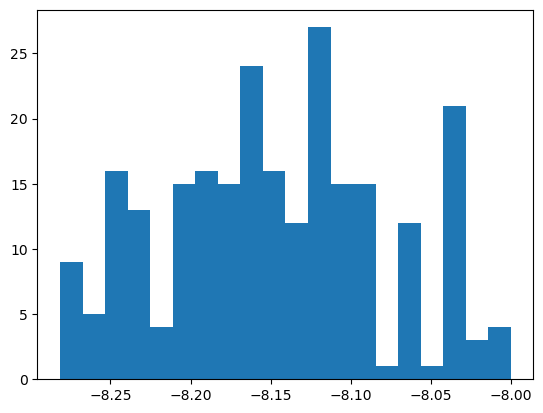

In [5]:
# make a histogram of the interaction Energy
plt.hist(interaction['Interaction Energy'], bins=20)

# determine the top 5% of the Interaction Energy
top5 = interaction['Interaction Energy'].quantile(0.95)
top5

In [7]:
import pandas as pd

chunk_size = 10000  # Define your chunk size
top_percentile_threshold = 0.95  # Define the top 5% threshold

interactions = []

# Iterate over each chunk
for chunk in pd.read_csv('lncRNA_interaction_filtered.csv', chunksize=chunk_size):
    # Calculate the 95th percentile of 'Interaction Energy' in the current chunk
    top5_value = chunk['Interaction Energy'].quantile(top_percentile_threshold)
    
    # Filter rows that have 'Interaction Energy' in the top 5%
    top5_interaction = chunk[chunk['Interaction Energy'] >= top5_value]
    
    # Collect results
    interactions.append(top5_interaction)

# Concatenate all top 5% interaction data into a single DataFrame
result = pd.concat(interactions)

# Do something with the result DataFrame, e.g., save it to a new CSV
result.to_csv('top5_interactions.csv', index=False)


In [8]:
# import the filtered data
top5 = pd.read_csv('top5_interactions.csv')
top5

,Id,Query name,Query Length,Target name,Target Length,Accessibility Energy,Hybridization Energy,Interaction Energy,BasePair
0,156774094,ccar_ua01-ccar_g1089.t1,310,MSTRG.10186.3,2948,2.739810,-10.74,-8.00019,(214-220:350-344)
1,156755075,ccar_ua01-ccar_g1089.t1,310,MSTRG.1029.10,7041,1.594320,-9.60,-8.00568,(214-220:7866-7860)
2,156770796,ccar_ua01-ccar_g1089.t1,310,MSTRG.10722.1,2130,1.563910,-9.57,-8.00609,(214-220:156-150)
3,156847338,ccar_ua01-ccar_g1089.t1,310,MSTRG.10809.1,2806,5.883780,-13.89,-8.00622,(239-254:264-251)
4,156696586,ccar_ua01-ccar_g1089.t1,310,MSTRG.11841.5,2279,2.750900,-10.76,-8.00910,(214-220:1034-1028)
...,...,...,...,...,...,...,...,...,...
560488,269288104,scaffold_8-ccar_g79236.t1,206,ccar_ub25-ccar_g77947.t1,3419,5.056730,-13.06,-8.00327,(113-122:3175-3166)
560489,269225310,scaffold_8-ccar_g79236.t1,206,ccar_ub25-ccar_g77997.t1,1091,2.988380,-10.99,-8.00162,(149-158:296-287)
560490,269117837,scaffold_8-ccar_g79236.t1,206,scaffold_2-ccar_g78568.t1,225,12.219100,-20.23,-8.01092,(22-46:43-21)
560491,269175649,scaffold_8-ccar_g79236.t1,206,scaffold_23-ccar_g78697.t1,1001,0.635753,-8.64,-8.00425,(0-6:4277-4271)


In [10]:
# check if their is a query name that contains strg
top5['Query name'].str.contains('strg').any()

False